In [1]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
n = 1500
Input = np.zeros((n,2))
Output = np.zeros(n)
posibles = [(0,0,1), (0,1,0), (1,0,0), (1,1,1)]

for i in range(n):
    pareja = random.choice(posibles)
    Input[i,:] = pareja[0:2]
    Output[i] = pareja[2]

In [3]:
Input

array([[1., 0.],
       [1., 1.],
       [0., 1.],
       ...,
       [0., 0.],
       [1., 0.],
       [1., 1.]])

In [4]:
np.sum(Input[:,0])/n

0.5266666666666666

In [5]:
np.sum(Input[:,1])/n

0.5326666666666666

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,), kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='he_uniform')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

historial = model.fit(Input, Output, epochs=400, batch_size=32, verbose=False)

entrada_prueba = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
prediccion = model.predict(entrada_prueba)

for i in range(len(entrada_prueba)):
    print("Entrada: ", entrada_prueba[i], " Predicción: " , prediccion[i], " Predicción redondeada: ", round(prediccion[i][0]))

1/1 [==============================] - 0s 143ms/step
Entrada:  [0 0]  Predicción:  [0.98365253]  Predicción redondeada:  1
Entrada:  [0 1]  Predicción:  [0.00408681]  Predicción redondeada:  0
Entrada:  [1 0]  Predicción:  [0.00417846]  Predicción redondeada:  0
Entrada:  [1 1]  Predicción:  [0.9836493]  Predicción redondeada:  1


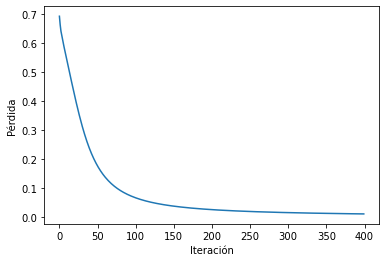

In [7]:
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.plot(historial.history["loss"])

In [8]:
print("Pérdida final: ", historial.history["loss"][-1])

Pérdida final:  0.010469256900250912
